<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed

In [37]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-06-15 16:53:43--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24157 (24K) [text/plain]
Saving to: ‘data_phot.csv.1’

data_phot.csv.1     100%[===================>]  23.59K  --.-KB/s    in 0.002s  

2021-06-15 16:53:44 (12.0 MB/s) - ‘data_phot.csv.1’ saved [24157/24157]



In [38]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [39]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [41]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4)  

In [42]:
data_sample_d.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,192.962965,193.058662,192.944679,192.922795,192.940159,192.971354,192.991158,192.900027,192.982868,192.919007,192.955163,192.906007,192.951678,192.961928,192.941595,192.956303,192.992399,192.959202,192.981066,192.960689,192.968395,192.970263,192.978531,192.990168,192.933832,193.064329,192.949179,192.939027,192.932087,192.941012,193.028692,193.017977,192.993027,192.894627,192.955531,192.951997,192.944020,192.983391,192.929480,192.986374,...,192.885902,192.965604,192.932200,192.977820,192.996729,192.915450,192.972150,192.935487,192.965545,192.997190,193.045614,193.010665,192.982160,192.965890,192.950189,192.999485,192.949384,193.023411,192.927622,192.941122,193.005462,192.971484,192.962393,192.889592,192.980111,192.919561,192.981448,192.951768,192.958982,192.977348,192.929462,192.924853,192.907647,192.892733,193.011606,192.894313,192.950753,192.945504,192.985019,192.946448
1,106.534074,106.498491,106.527903,106.524343,106.496287,106.483137,106.538563,106.544900,106.520898,106.535161,106.526773,106.530152,106.533268,106.523461,106.553109,106.542830,106.526518,106.518822,106.502882,106.528953,106.549596,106.530009,106.533683,106.531462,106.544487,106.545508,106.510059,106.550338,106.533688,106.510927,106.534188,106.546863,106.550721,106.544661,106.606070,106.500225,106.544695,106.541466,106.521348,106.568104,...,106.545569,106.523964,106.516730,106.522620,106.546630,106.513839,106.529892,106.538012,106.511124,106.531214,106.533287,106.528053,106.519284,106.511757,106.488051,106.539604,106.532038,106.505988,106.548867,106.524325,106.542712,106.504577,106.505159,106.560592,106.517663,106.527708,106.545285,106.540433,106.509896,106.521076,106.557228,106.542759,106.513056,106.540897,106.478835,106.530518,106.518334,106.509453,106.521602,106.524361
2,40.706378,40.706488,40.706425,40.706154,40.706296,40.706393,40.706422,40.706452,40.706262,40.706461,40.706240,40.706343,40.706362,40.706341,40.706446,40.706434,40.706497,40.706407,40.706305,40.706514,40.706205,40.706486,40.706262,40.706378,40.706296,40.706310,40.706353,40.706378,40.706285,40.706231,40.706441,40.706315,40.706360,40.706352,40.706373,40.706339,40.706235,40.706274,40.706306,40.706355,...,40.706295,40.706311,40.706420,40.706316,40.706454,40.706405,40.706455,40.706421,40.706474,40.706285,40.706233,40.706416,40.706269,40.706380,40.706252,40.706439,40.706380,40.706326,40.706411,40.706519,40.706380,40.706399,40.706358,40.706355,40.706546,40.706216,40.706338,40.706364,40.706508,40.706409,40.706447,40.706331,40.706236,40.706400,40.706338,40.706443,40.706355,40.706340,40.706448,40.706482
3,148.673104,148.667464,148.671740,148.682972,148.674493,148.673561,148.676504,148.651815,148.669107,148.680803,148.666206,148.674259,148.672362,148.662362,148.671753,148.670062,148.671996,148.673850,148.689389,148.687966,148.656408,148.680838,148.684715,148.676424,148.672901,148.688660,148.668560,148.690929,148.674265,148.666227,148.656320,148.662055,148.680828,148.663033,148.668523,148.682453,148.680652,148.673568,148.683490,148.669395,...,148.668006,148.681556,148.663192,148.679133,148.674968,148.658658,148.687711,148.687414,148.674996,148.679766,148.671114,148.687787,148.661080,148.672647,148.654529,148.662008,148.673669,148.668919,148.685956,148.669064,148.670084,148.656390,148.672043,148.652792,148.658232,148.674241,148.669105,148.680048,148.660836,148.669925,148.686587,148.656899,148.658384,148.666219,148.672960,148.664908,148.664230,148.692657,148.662759,148.689880
4,201.882461,201.843274,201.860486,201.842460,201.904719,201.851008,201.851462,201.878933,201.874994,201.854151,201.865178,201.861864,201.819863,201.838116,201.830786,201.825128,201.879749,201.875310,201.826171,201.833679

In [46]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['Kepmag'][i]) < 12 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['Kepmag'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['Kepmag'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['Kepmag'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['Kepmag'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.017
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.015
18 0.015
19 0.015
20 0.04
21 0.025
22 0.015
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.015
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.015
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.015
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.015
98 0.04
99 0.04
100 0.015
101 0.015
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [48]:
#build sd_r
data_phot['sd_r'] = data_phot['r'] * data_phot['rms']

In [49]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [50]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,17.170714,16.701400,17.965164,17.273873,16.071989,16.402512,17.192824,17.833775,17.004006,17.493452,17.237363,16.618182,17.860864,17.142251,16.489452,16.441604,17.742786,17.827020,16.821239,18.080184,17.186650,16.125971,16.625713,16.519824,17.432322,16.736904,17.989028,16.724150,17.132350,17.255071,16.382764,17.760729,16.947738,17.245146,17.678519,16.165155,16.902974,17.348083,17.642000,16.460509,...,18.358983,17.046441,16.494027,16.107544,16.197606,16.550797,18.309983,17.991320,17.964838,16.261823,17.818445,17.578345,17.020957,17.765490,18.038103,17.423268,16.893399,16.128334,17.552701,17.337230,17.125399,16.066108,17.186624,17.489044,16.355943,17.727364,16.013798,16.957778,18.224629,16.055644,16.879947,17.027700,17.014489,17.898554,16.831981,18.315192,16.286669,16.872593,17.803330,18.470771
1,20.669459,18.238094,20.872478,21.325422,18.691714,18.334933,18.917080,17.977182,16.538802,18.725305,20.397769,18.955215,17.826862,20.379916,19.700579,18.384036,18.629431,17.062527,16.613821,18.473240,15.871534,19.530322,18.416805,17.765393,18.674359,18.837856,19.239925,18.237573,18.254301,17.666375,18.278307,19.603881,17.411914,19.309150,18.672880,18.509734,18.763095,17.596721,17.838354,18.553785,...,19.875884,17.925379,19.272454,18.739122,18.278837,19.377276,18.078885,17.854110,18.526860,19.138622,19.147708,20.902784,16.699506,17.447196,18.491254,18.225511,18.635170,19.919185,18.460973,17.696257,19.985507,20.860503,18.214090,17.594073,17.835262,21.179166,19.217705,18.261693,19.383088,18.685044,18.807765,20.972584,18.403945,19.392559,15.571814,20.094004,18.924322,16.876126,18.433235,20.664935
2,14.613966,14.603639,14.665836,15.005412,15.590880,14.902977,14.436392,14.683270,15.156980,15.005347,14.943399,14.590664,14.758317,15.058894,15.170103,15.142304,14.974155,14.890007,15.028590,14.849082,15.257296,14.400453,15.321334,14.361568,14.602572,14.819360,14.795956,15.225338,15.172236,14.666397,14.672603,14.717888,15.585050,14.936771,15.100973,14.928829,14.801901,14.794840,15.103376,14.926981,...,14.646891,15.459940,15.413578,15.292537,14.909090,15.155235,15.022475,14.644741,14.924620,14.944487,14.819613,14.708326,15.323575,14.743448,15.053889,15.054985,14.910651,15.110386,15.033675,14.944565,14.876130,15.089622,14.479645,14.747060,14.746121,15.409211,15.029685,15.199030,15.353014,15.132455,14.700899,14.604923,15.003088,15.100075,14.457112,14.960826,14.766090,14.643192,15.565060,14.955847
3,16.358664,16.796191,16.656604,16.540490,16.306917,16.301922,16.196631,16.324972,16.161482,16.956242,16.697591,16.424028,17.186439,15.926173,17.068276,17.312704,16.031348,16.514848,16.574083,16.979016,16.494004,16.810619,16.655229,17.038242,17.555168,16.259443,15.799025,17.132224,16.638798,17.040323,16.401698,16.489596,16.623565,16.718704,16.190131,17.541391,16.427465,17.348197,17.155113,16.962854,...,17.064469,16.656667,16.183066,16.609452,17.112516,16.211003,16.452409,17.051522,16.819674,17.609762,16.722336,16.365762,16.900980,17.452599,16.244726,16.696073,16.845865,16.760853,16.255278,16.783593,17.149533,17.163438,16.341542,16.729531,16.625604,17.058361,16.691190,15.721720,17.434745,16.969314,17.194724,16.620380,16.197474,16.164737,16.576029,16.327652,16.268362,17.232508,16.494759,16.406438
4,16.741865,16.578211,16.690947,17.006723,16.759529,17.038006,17.269923,16.217644,16.630991,16.723197,16.134859,16.316118,16.639421,16.303297,16.612265,17.161427,16.446817,16.650767,16.621523,15.921009,16.548968,16.327143,15.997974,15.387628,16.521889,16.705441,16.700490,16.342184,16.773464,17.197675,16.709946,16.838984,16.150062,16.725942,16.355079,16.461917,15.760665,16.313640,16.982421,16.087205,...,16.779943,16.830788,15.671600,16.611972,16.389369,16.43

In [51]:
# find M_r
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
for i in range(208) :
  M_r[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [52]:
M_r = M_r.T
M_r['Median'] = np.median(M_r,axis=1)

In [53]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)

In [54]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']

In [55]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.689799,10.219408,11.484455,10.793410,9.591330,9.921502,10.711592,11.353569,10.522867,11.013032,10.756536,10.137908,11.380076,10.661347,10.008778,9.960764,11.261540,11.346147,10.340120,11.599295,10.705674,9.644974,10.144623,10.038603,10.951735,10.254848,11.508268,10.243504,10.651782,10.774403,9.901109,11.279195,10.466485,10.765001,11.197688,9.684363,10.422272,10.866938,11.161462,9.979331,...,10.070417,11.828965,11.510714,11.483894,9.780523,11.336600,11.096894,10.539826,11.284542,11.557331,10.941942,10.412637,9.646739,11.072184,10.856561,10.644006,9.585098,10.705715,11.008954,9.874835,11.246937,9.532675,10.476989,11.743759,9.574567,10.399409,10.547214,10.534197,11.418429,10.350518,11.835050,9.805892,10.391875,11.322167,11.990041,10.495534,9.766435,11.246196,-0.729099,0.750662
1,15.512810,13.082170,15.715954,16.168971,13.535835,13.179322,13.760339,12.820313,11.382422,13.568634,15.241269,13.798646,12.670230,15.223484,14.543542,13.227209,13.472936,11.906189,11.457807,13.316695,10.714569,14.373756,13.260164,12.608797,13.517498,13.680974,14.083766,13.080592,13.097660,12.510198,13.121656,14.446972,12.254926,14.152285,13.514764,13.353775,13.606230,12.439921,12.681965,13.396442,...,14.221039,12.922321,12.697381,13.370679,13.982031,13.991075,15.746258,11.543158,12.291002,13.335543,13.068750,13.478563,14.763109,13.304022,12.539807,14.828682,15.704455,13.058030,12.436883,12.678947,16.022647,14.060827,13.104914,14.226931,13.528660,13.650645,15.815758,13.247724,14.235771,10.416292,14.937427,13.767994,11.719979,13.276840,15.508484,13.620323,12.404379,14.853561,-1.215944,1.233238
2,11.556435,11.546102,11.608302,11.947893,12.533353,11.845445,11.378859,11.625735,12.099455,11.947812,11.885875,11.533135,11.700787,12.001365,12.112568,12.084770,11.916618,11.832475,11.971062,11.791543,12.199774,11.342916,12.263809,11.304037,11.545045,11.761833,11.738426,12.167807,12.114710,11.608873,11.615068,11.660360,12.527520,11.879241,12.043442,11.871300,11.744377,11.737314,12.045849,11.869451,...,12.097702,11.964939,11.587207,11.867084,11.886960,11.762089,11.650792,12.266050,11.685916,11.996365,11.997450,11.853120,12.052857,11.976142,11.887027,11.818598,12.032089,11.422114,11.689530,11.688581,12.351688,11.972156,12.141499,12.295476,12.074922,11.643364,11.547394,11.945564,12.042542,11.399583,11.903291,11.708560,11.585662,12.507525,11.898310,11.888862,11.598363,12.176405,-0.290499,0.287543
3,10.454864,10.892474,10.752824,10.636546,10.403097,10.398115,10.292782,10.421482,10.257740,11.052330,10.793891,10.520211,11.282650,10.022530,11.164495,11.408949,10.127564,10.611037,10.670045,11.074999,10.590448,10.906706,10.751260,11.134394,11.651371,10.355416,9.895291,11.228163,10.734981,11.136623,10.498143,10.585958,10.719652,10.815051,10.286398,11.637455,10.523554,11.444390,11.251161,11.059108,...,10.307413,10.548396,11.147513,10.915847,11.705865,10.818565,10.461748,10.997355,11.548805,10.341197,10.792435,10.942057,10.857114,10.351290,10.879852,11.245777,11.259882,10.437757,10.826027,10.722021,11.154545,10.787448,9.817819,11.531124,11.065561,11.290727,10.716817,10.293889,10.261037,10.672231,10.423971,10.364691,11.328422,10.591110,10.502392,10.841843,10.379369,11.290065,-0.462474,0.448222
4,10.150054,9.986822,10.099373,10.415343,10.167479,10.446534,10.678446,9.625872,10.039261,10.131691,9.543235,9.724529,10.048283,9.711964,10.021010,10.570234,9.855035,10.059034,10.030317,9.329723,9.957411,9.735268,9.406263,8.796258,9.930258,10.114067,10.109064,9.750935,10.181968,10.606405,10.118738,10.247247,9.558197,10.134175,9.763943,9.870420,9.169417,9.721838,10.390824,9.496098,...,9.847878,10.322179,9.725352,10.136683,9.512206,10.649769,9.955683,10.207101,10.185276,9.5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


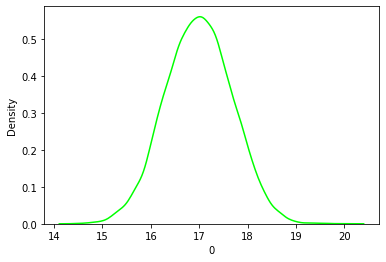

In [ ]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


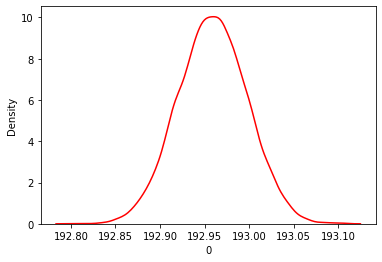

In [ ]:
sns.distplot(data_sample_d[0] , color = 'red' , hist=False)

In [56]:
M_r.to_csv("M_r_phot.csv") 